In [33]:
import numpy as np
import timeit
from derivativeClass import DerivativeNum4
import matplotlib.pyplot as plt
plt.rc('font', size=20)

In [34]:
# RHS params
ALPHA  = 0.2 
R = 100.

INIT_VALUE = 2.

# Grid params
NUM_BLOCKS = 30
T_START = 0.
T_END = 80.

# Differentiation param
STEP = 10e-3

EPS = 10e-3

In [35]:
class LogisticRightHandSide:
        
    def __init__(self, alpha, R):
        self._alpha = float(alpha)
        self._R = float(R)
    
    
    def __call__(self, u):
        return self._alpha * u * (1. - u / self._R)

In [36]:
class NumMethod:
    
    def __init__(self, f, u0, numBlocks, tStart, tEnd):
        
        self.f = f
        self.u0 = u0
       
        self.numBlocks, self.numPoints = numBlocks, numBlocks + 1
        self.dt = (float(tEnd) - float(tStart))/float(self.numBlocks)
        
        self.solutionArray = np.zeros(self.numPoints)
        self.timeArray = np.linspace(tStart, tEnd, self.numPoints)
        
        self.tStart, self.tEnd = float(tStart), float(tEnd)
        
        
        print('Объект класса ' + self.__class__.__name__ + ' создан.')


    def getTimeArray(self):
        return self.timeArray
    
    def getSolutionArray(self):
        return self.solutionArray
    
    
    def solve(self):

        print('Начало расчета методом %s ...' % self.__class__.__name__)
        start = timeit.default_timer()
        
        self.solutionArray[0] = self.u0
        
        for i in range(self.numBlocks):
            
            # for short
            uOld, dt, f = self.solutionArray[i], self.dt, self.f
                                
            self.solutionArray[i + 1] = self._advanceNextStep(i)
            
            # Progress check
            if ((i + 1) % (self.numBlocks // 10) == 0):
                t = self.timeArray[i + 1]
                print('%.2f%% вычислений завершено' % (100. * float(t) / (self.tEnd - self.tStart)))
                               
        elapsedTime = float(timeit.default_timer() - start)
        print('Время расчета: %.2e сек.' % elapsedTime)

    
    def _advanceNextStep(self, i):
        pass
    

    def plotSolution(self):
        plt.figure(figsize=(11,7))
        plt.plot(self.timeArray, self.solutionArray, '-o')
        plt.grid('off')
        plt.title('Решение методом %s ' % self.__class__.__name__)
        plt.xlabel('Время')
        plt.ylabel('Популяция')
        plt.show()

In [37]:
class ExplicitEuler(NumMethod):    

    def _advanceNextStep(self, i):
        uOld, dt, f = self.solutionArray[i], self.dt, self.f  
        
        uNew = uOld + dt * f(uOld)      
        return uNew

In [38]:
class Heun(NumMethod):

    def _advanceNextStep(self, i):       
        uOld, dt, f = self.solutionArray[i], self.dt, self.f
        
        uStar = uOld + dt * f(uOld) 
        
        uNew = uOld + dt / 2. * (f(uOld) + f(uStar))        
        return uNew

In [39]:
class RK4(NumMethod):

    def _advanceNextStep(self, i):        
        uOld, dt, f = self.solutionArray[i], self.dt, self.f

        k1 = f(uOld)
        k2 = f(uOld + dt / 2. * k1)
        k3 = f(uOld + dt / 2. * k2)
        k4 = f(uOld + dt * k3)
        
        return uOld + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)  

In [40]:
class ImplicitTrapezium(NumMethod):

    def solveViaNewton(self, i):        
        uOld, dt, f = self.solutionArray[i], self.dt, self.f
        
        # Initial approximation
        uNew = uOld

        # Implicit Trapezoid Formula
        F = lambda uNew: uNew  - dt / 2. * f(uNew) - uOld - dt / 2. * f(uOld)

        derF = DerivativeNum4(F, STEP)
        
        # Iterative formula
        uNewNext = uNew - F(uNew) / derF(uNew)

        # Required precision
        while(abs(uNew - uNewNext) >= EPS):
            uNew = uNewNext
            uNewNext = uNew - F(uNew) / derF(uNew)
        
        return uNewNext


    def _advanceNextStep(self, i):
        return self.solveViaNewton(i)

In [41]:
rhs1 = LogisticRightHandSide(alpha=ALPHA, R=R)

dt = float(T_END)/NUM_BLOCKS

Объект класса ExplicitEuler создан.
Начало расчета методом ExplicitEuler ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.63e-03 сек.


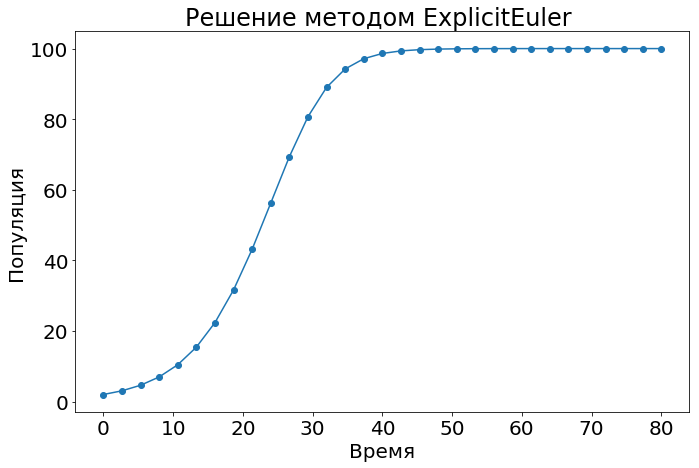

Объект класса Heun создан.
Начало расчета методом Heun ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.66e-03 сек.


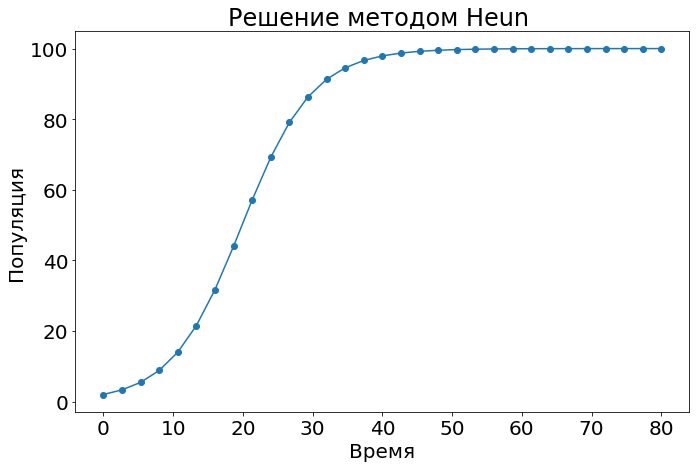

Объект класса RK4 создан.
Начало расчета методом RK4 ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.17e-03 сек.


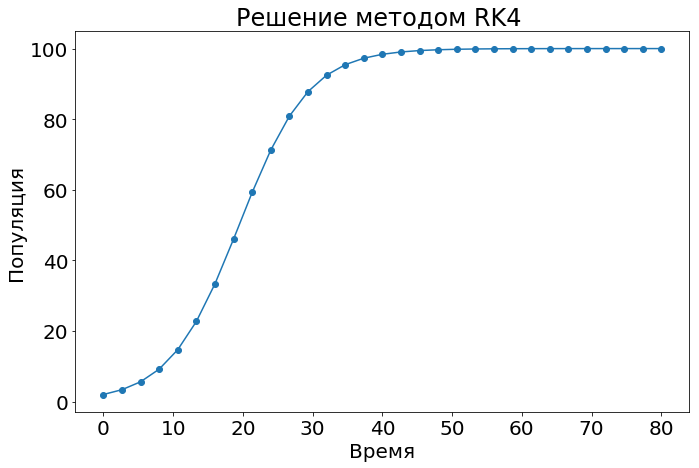

Объект класса ImplicitTrapezium создан.
Начало расчета методом ImplicitTrapezium ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.89e-03 сек.


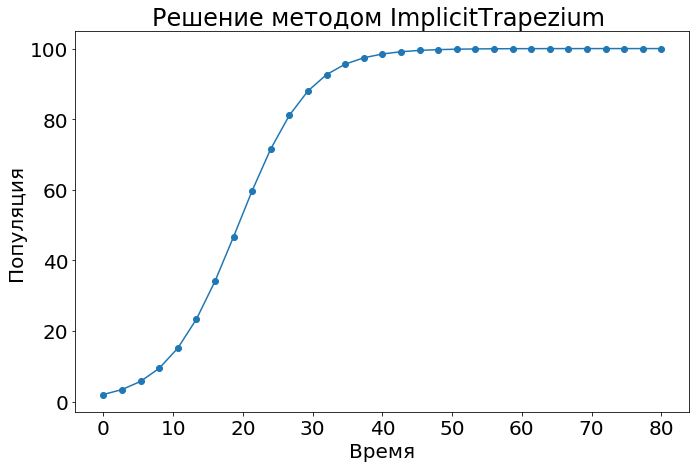

In [42]:
# Method usage example
methodsClass = [ExplicitEuler, Heun, RK4, ImplicitTrapezium]

for methodClass in methodsClass:
    method = methodClass(f=rhs1, u0=INIT_VALUE, numBlocks=NUM_BLOCKS, tStart=T_START, tEnd=T_END)
    
    method.solve()
    method.plotSolution()

Объект класса ExplicitEuler создан.
Начало расчета методом ExplicitEuler ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.27e-03 сек.
Объект класса Heun создан.
Начало расчета методом Heun ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений завершено
80.00% вычислений завершено
90.00% вычислений завершено
100.00% вычислений завершено
Время расчета: 1.58e-03 сек.
Объект класса RK4 создан.
Начало расчета методом RK4 ...
10.00% вычислений завершено
20.00% вычислений завершено
30.00% вычислений завершено
40.00% вычислений завершено
50.00% вычислений завершено
60.00% вычислений завершено
70.00% вычислений з

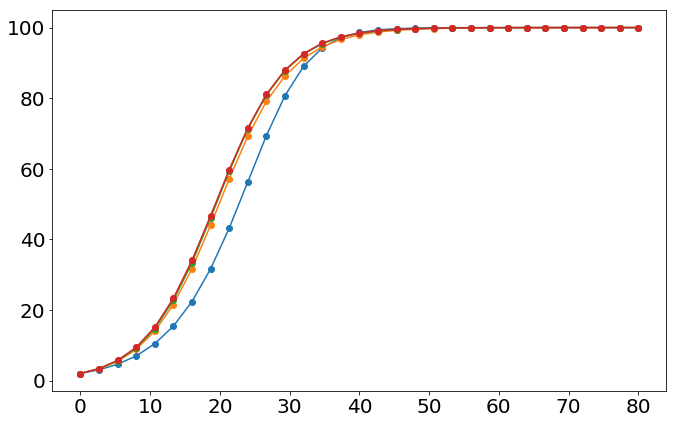

In [43]:
# Every method on one plot
plt.figure(figsize=(11,7))

for methodClass in methodsClass:
    method = methodClass(f=rhs1, u0=INIT_VALUE, numBlocks=NUM_BLOCKS, tStart=T_START, tEnd=T_END)
    method.solve()
    plt.plot(method.getTimeArray(), method.getSolutionArray(), '-o')
plt.show()